<h1 align = "center"> Sunrun Data Analysis Project </h1>

# Overview
This project analyzes the meter data taken on hourly intervals from 4 meters. The four meters correspond to
-  Home load
-  Solar Generation
-  Battery state of charge
-  Home Net Load

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

# Objectives
-  Create a labeled version of the data set.
-  Visualization of the data set.
-  Meaningful interpretation and inference of the visualization.
-  Providing statistical summary of the data.

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## 1.Importing Libraries

In [47]:
import numpy as np
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt; plt.rcdefaults()
import sys
import seaborn as sns
import copy

In [48]:
warnings.filterwarnings("ignore")

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## 2. Loading and Pre-processing the dataset
-  Loaded the dataset from Microsoft Excel.
-  Renamed the columns.
-  Checked the data types of the various columns.
-  Checked for null values.
-  Examined the dataset.


In [49]:
# Loading the dataset
df = pd.read_csv("C:/Users/manis/OneDrive/Desktop/Sunrun_take_home.csv")

In [50]:
# Renaming columns
df = df.rename(index=str, columns={'Meter 1 - kWh':"Home Load",'Meter 2 - kWh': "Solar Generation",
                              'Meter 3 - kWh':"Battery State Charge", 'Meter 4 - kWh':"Home Net Load"})

#Checking the data types of the valrious columns
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 0 to 8759
Data columns (total 10 columns):
S.No                    8760 non-null int64
datetime                8760 non-null object
Home Load               8760 non-null float64
Solar Generation        8760 non-null float64
Battery State Charge    8760 non-null float64
Home Net Load           8760 non-null float64
Month                   8760 non-null int64
Day                     8760 non-null int64
Year                    8760 non-null int64
Time                    8760 non-null object
dtypes: float64(4), int64(4), object(2)
memory usage: 752.8+ KB


In [51]:
# Checking for Null Values
df.isnull().values.any()

False

In [52]:
# Examning the dataset
df.head()

,S.No,datetime,Home Load,Solar Generation,Battery State Charge,Home Net Load,Month,Day,Year,Time
0,0,01-01-2017 00:00,0.712120,0.0,7.44,0.712120,1,1,2017,12:00 AM
1,1,01-01-2017 01:00,0.601273,0.0,7.44,0.601273,1,1,2017,01:00 AM
2,2,01-01-2017 02:00,0.572490,0.0,7.44,0.572490,1,1,2017,02:00 AM
3,3,01-01-2017 03:00,0.582209,0.0,7.44,0.582209,1,1,2017,03:00 AM
4,4,01-01-2017 04:00,0.632759,0.0,7.44,0.632759,1,1,2017,04:00 AM


In [53]:
# Summary statistic of January
df_time = []
df_SG = []
df_HL = []
df_BSC = []
df_HNL = []
for i in range(len(df)):
    if df['Month'][i] == 1:
        df_time.append(df['Time'][i])
        df_SG.append(df['Solar Generation'][i])
        df_HL.append(df['Home Load'][i])
        df_BSC.append(df['Battery State Charge'][i])
        df_HNL.append(df['Home Net Load'][i])
    else:
            break
      
print('Janurary Data Statastics')
print()
print('Solar Generation')
print(pd.DataFrame(df_SG).describe())

print()
print('Battery State Charge')
print(pd.DataFrame(df_BSC).describe())

print()
print('Home Load')
print(pd.DataFrame(df_HL).describe())

print()
print('Home Net Load')
print(pd.DataFrame(df_HNL).describe())

Janurary Data Statastics

Solar Generation
                0
count  744.000000
mean     0.640117
std      0.938552
min      0.000000
25%      0.000000
50%      0.000000
75%      1.339085
max      3.101388

Battery State Charge
                  0
count  7.440000e+02
mean   7.440000e+00
std    6.932452e-14
min    7.440000e+00
25%    7.440000e+00
50%    7.440000e+00
75%    7.440000e+00
max    7.440000e+00

Home Load
                0
count  744.000000
mean     1.037589
std      0.318668
min      0.555657
25%      0.873132
50%      0.981148
75%      1.181222
max      1.679252

Home Net Load
                0
count  744.000000
mean     0.413474
std      1.003035
min     -2.059095
25%     -0.331815
50%      0.642856
75%      1.099875
max      1.679252


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

# 3. Monthly Analysis
- Sum and Average of Solar Generation of all months
- Sum and Average of Home Load
- Sum and Average of Battery State of Charge
- Sum and Average of Home Net Load

## 3a. Solar Generation Statistics
-  Determined the following
    -  Total Solar Generation per month
    -  Average Solar Generation per month
    -  Number of days per month

In [54]:
# Solar Generation Statistics
SG_sum_df_m = df.groupby('Month', as_index=False).agg({"Solar Generation": "sum"})['Solar Generation']
SG_avg_df_m = df.groupby('Month', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation']
Cnt_Days_df_m = df.groupby('Month', as_index=False).agg({"Day": "count"})['Day']/24

print('Solar Generation Statstics')
months = ('jan', 'Feb', 'March', 'April', 'May', 'June', 'July' ,'Aug', 'Sept', 'Oct','Nov',
          'Dec')
fmt = '{:<8}{:<20}{:<25}{}'

print(fmt.format('Months', 'Sum', 'Average','Count of Day'))
for months, (months,Sum, Average,Count_of_Days) in enumerate(zip(months,SG_sum_df_m, SG_avg_df_m,Cnt_Days_df_m)):
    print(fmt.format(months, Sum, Average,Count_of_Days))


Solar Generation Statstics
Months  Sum                 Average                  Count of Day
jan     476.2473430820003   0.6401173966155919       31.0
Feb     476.5508692670004   0.7091530792663696       28.0
March   608.9019803340002   0.8184166402338713       31.0
April   734.0738207860003   1.0195469733138893       30.0
May     791.6135115210004   1.0639966552701619       31.0
June    780.8729975820005   1.0845458299750006       30.0
July    802.7749576830009   1.0789985990362916       31.0
Aug     812.4652193239999   1.092023144252688        31.0
Sept    668.4739743889997   0.9284360755402774       30.0
Oct     571.1921469069999   0.767731380251344        31.0
Nov     513.646057541       0.7133973021402777       30.0
Dec     453.16198580200046  0.6090886905940867       31.0


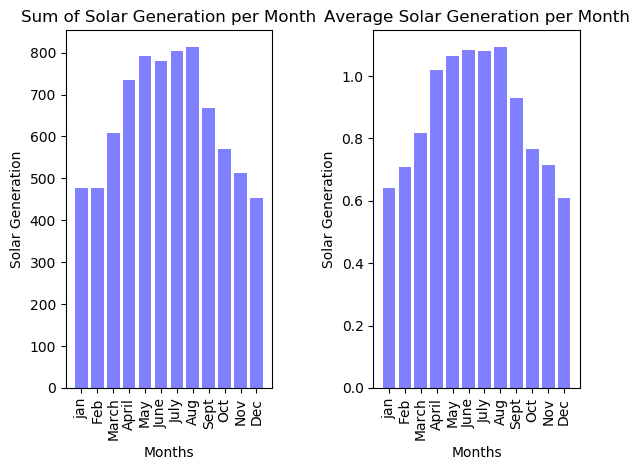

In [55]:
# Created list of months to be accessed
months = ('jan', 'Feb', 'March', 'April', 'May', 'June', 'July' ,'Aug', 'Sept', 'Oct','Nov',
          'Dec')
y_pos = np.arange(len(months))

plt.subplot(1,2,1)
plt.bar(y_pos, SG_sum_df_m, align='center', alpha=0.5,color='b')
plt.xticks(y_pos, months)
plt.xlabel('Months')
plt.ylabel('Solar Generation')
plt.title('Sum of Solar Generation per Month')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.bar(y_pos, SG_avg_df_m, align='center', alpha=0.5,color='b')
plt.xticks(y_pos, months)
plt.xlabel('Months')
plt.ylabel('Solar Generation')
plt.title('Average Solar Generation per Month')
plt.tight_layout()
plt.xticks(rotation=90)

plt.show()

### Inference 
The following can be inferred from the above graphs:
-  Starting from January, it can be seen that Solar Generation begins to gradually increase from January till April and then remains somewhat constant till August and then once again begins to decrease towards the end of the year(December).
-  Taking seasonal division into consideration, it can be infered that Solar Generation is at it's peak during the spring and summer period of April to August.
-  Similarly, Solar Generation seems to be lesser during Fall period of September to November and Winter period of December to February when compared to the spring and summer season.(This can be seen in the graph below)

#### Bonus Insight
- The average solar generation per month graph almost seems to be following a Normal Distribution. (Bell Shaped Curve) 

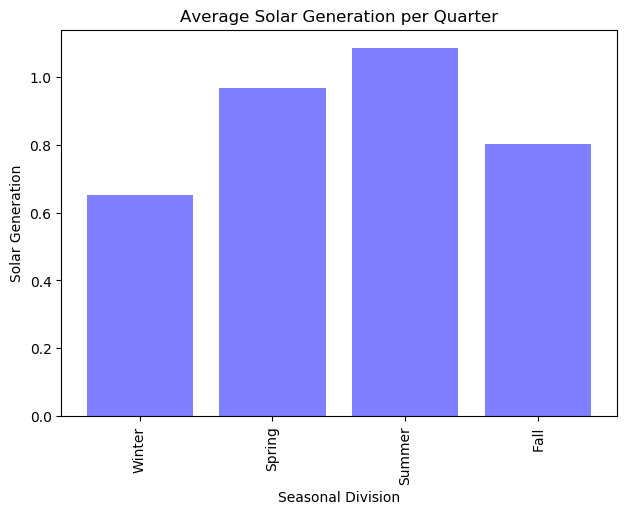

In [105]:
# Creating Quarterly averages
SG_avg_df_Q1 = (SG_avg_df_m[11] + SG_avg_df_m[0] + SG_avg_df_m[1])/3
SG_avg_df_Q2 = (SG_avg_df_m[2] + SG_avg_df_m[3] + SG_avg_df_m[4])/3
SG_avg_df_Q3 = (SG_avg_df_m[5] + SG_avg_df_m[6] + SG_avg_df_m[7])/3
SG_avg_df_Q4 = (SG_avg_df_m[8] + SG_avg_df_m[9] + SG_avg_df_m[10])/3

# Quarterly Analysis
SG_avg_df_Q = [SG_avg_df_Q1,SG_avg_df_Q2,SG_avg_df_Q3,SG_avg_df_Q4]
Quarters = ['Winter','Spring','Summer','Fall']
y_pos = np.arange(len(Quarters))

#Creating a plot
plt.bar(y_pos, SG_avg_df_Q, align='center', alpha=0.5,color='b')
plt.xticks(y_pos, Quarters)
plt.xlabel('Seasonal Division')
plt.ylabel('Solar Generation')
plt.title('Average Solar Generation per Quarter')
plt.tight_layout()
plt.xticks(rotation=90)

plt.show()

## 3b. Home Load Statisitics
-  Determined the following
    -  Total Home Load per month
    -  Average Home Load per month
    -  Number of days per month

In [58]:
# Home Load Statistics
HL_sum_df_m = df.groupby('Month', as_index=False).agg({"Home Load": "sum"})['Home Load']
HL_avg_df_m = df.groupby('Month', as_index=False).agg({"Home Load": "mean"})['Home Load']

print('Home Load Statistics')
months = ('jan', 'Feb', 'March', 'April', 'May', 'June', 'July' ,'Aug', 'Sept', 'Oct','Nov',
          'Dec')
fmt = '{:<8}{:<20}{:<25}{}'

print(fmt.format('Months', 'Sum', 'Average','Count of Day'))
for months, (months,Sum, Average,Count_of_Days) in enumerate(zip(months,HL_sum_df_m, HL_avg_df_m,Cnt_Days_df_m)):
    print(fmt.format(months, Sum, Average,Count_of_Days))


Home Load Statistics
Months  Sum                 Average                  Count of Day
jan     771.9658993270001   1.0375885743642475       31.0
Feb     647.764984644001    0.9639359890535728       28.0
March   645.5847729480009   0.8677214690161302       31.0
April   588.2660813049993   0.8170362240347212       30.0
May     559.802378652       0.7524225519516129       31.0
June    539.495533943       0.7492993526986111       30.0
July    598.7466090039995   0.8047669475860209       31.0
Aug     621.6490859790001   0.8355498467459679       31.0
Sept    617.0510399370002   0.8570153332458336       30.0
Oct     640.5808976659997   0.8609958301962362       31.0
Nov     667.7416808129999   0.9274190011291665       30.0
Dec     791.3259000289999   1.0636100806841395       31.0


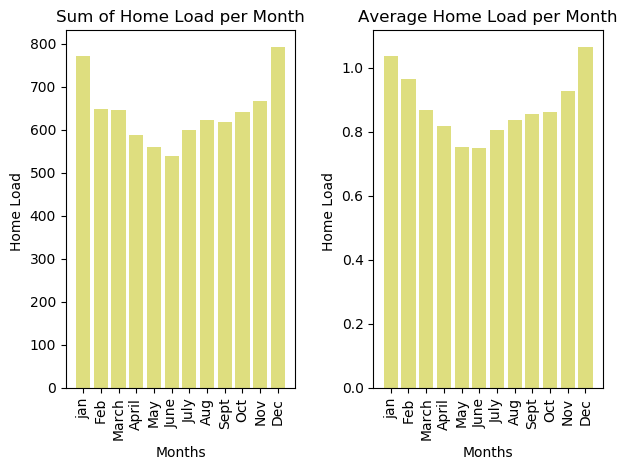

In [59]:
# Created list of months to be accessed
months = ('jan', 'Feb', 'March', 'April', 'May', 'June', 'July' ,'Aug', 'Sept', 'Oct','Nov',
          'Dec')

y_pos = np.arange(len(months))

plt.subplot(1,2,1)
plt.bar(y_pos, HL_sum_df_m, align='center', alpha=0.5,color='y')
plt.xticks(y_pos, months)
plt.xlabel('Months')
plt.ylabel('Home Load ')
plt.title('Sum of Home Load per Month')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.bar(y_pos, HL_avg_df_m, align='center', alpha=0.5,color='y')
plt.xticks(y_pos, months)
plt.xlabel('Months')
plt.ylabel('Home Load ')
plt.title('Average Home Load per Month')
plt.tight_layout()
plt.xticks(rotation=90)

plt.show()

### Inference
The following can be inferred from the above graphs
-  Starting from January, it can be seen that the Home Load begins to gradually decrease from January till April and then remains somewhat constant in the same range till August and then once again begins to increase towards the end of the year(December).
- Home Load is at its peak during January(Beginning of the year) and December(End of the year)

#### Bonus Insights
-  Taking seasonal division into consideration, Home Load seems to have an opposite effect when compared to Solar Generation.
    -  Home load seems to be high during Fall and Winter.
    -  Home Load seems to be low during Spring and Summer.

## 3c. Battery State of Charge Statistics
-  Determined the following
    -  Total Battery State of Charge per month
    -  Average Battery State of Charge per month
    -  Number of days per month

In [60]:
# Battery State Charge Statistics
BSC_sum_df_m = df.groupby('Month', as_index=False).agg({"Battery State Charge": "sum"})['Battery State Charge']
BSC_avg_df_m = df.groupby('Month', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge']

print('Battery State Charge Statistics')
months = ('jan', 'Feb', 'March', 'April', 'May', 'June', 'July' ,'Aug', 'Sept', 'Oct','Nov',
          'Dec')
fmt = '{:<8}{:<20}{:<25}{}'

print(fmt.format('Months', 'Sum', 'Average','Count of Day'))
for months, (months,Sum, Average,Count_of_Days) in enumerate(zip(months,BSC_sum_df_m, BSC_avg_df_m,Cnt_Days_df_m)):
    print(fmt.format(months, Sum, Average,Count_of_Days))


Battery State Charge Statistics
Months  Sum                 Average                  Count of Day
jan     5535.359999999949   7.439999999999931        31.0
Feb     4999.679999999978   7.439999999999967        28.0
March   5535.359999999949   7.439999999999931        31.0
April   5356.799999999958   7.439999999999942        30.0
May     5535.359999999949   7.439999999999931        31.0
June    1081.5557544789992  1.5021607701097213       30.0
July    1046.3489494729995  1.406382996603494        31.0
Aug     1078.1376606109998  1.4491097588857524       31.0
Sept    906.0297958130004   1.258374716406945        30.0
Oct     807.5811213759996   1.0854584964731178       31.0
Nov     5266.7218586779945  7.314891470386104        30.0
Dec     5523.117820752004   7.423545458000006        31.0


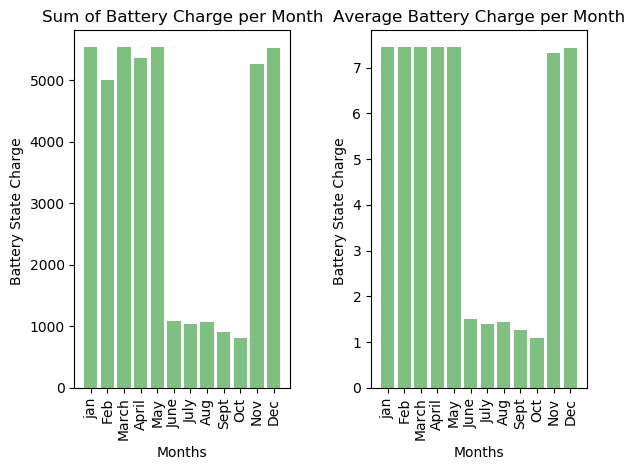

In [61]:
# Created list of months to be accessed
months = ('jan', 'Feb', 'March', 'April', 'May', 'June', 'July' ,'Aug', 'Sept', 'Oct','Nov',
          'Dec')

y_pos = np.arange(len(months))

plt.subplot(1,2,1)
plt.bar(y_pos, BSC_sum_df_m, align='center', alpha=0.5,color='g')
plt.xticks(y_pos, months)
plt.xlabel('Months')
plt.ylabel('Battery State Charge ')
plt.title('Sum of Battery Charge per Month')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.bar(y_pos, BSC_avg_df_m, align='center', alpha=0.5,color='g')
plt.xticks(y_pos, months)
plt.xlabel('Months')
plt.ylabel('Battery State Charge ')
plt.title('Average Battery Charge per Month')
plt.tight_layout()
plt.xticks(rotation=90)

plt.show()

## Inference
The following can be inferred from the above graphs :
-  The average Battery State of Charge seems to be almost constant from January to May and then drops drasticall in June and somewhat remaians in the same range till October and then once again jumps back up in Novermber and then barely increases by a small value in December.

#### Bonus Insights
-  When considering the first graph that gives the total Battery State of Charge per month, It can be seen that January, March and May have the same reading while February and April slightly differ althought the Battery State of Charge is same throughout all these months.
-  This is only due to the difference in the number of days in the month. 
-  It is reccommended to take the average of values when dealing with such kind of data and hence in this case, the average Battery State of Charge graph is proven to be more insightful.

## 3.d Home Net Load Statistics
-  Determined the following
    -  Total Home Net Load per month
    -  Average Home Net Load per month
    -  Number of days per month

In [62]:
# Home Net Load Statistics
HNL_sum_df_m = df.groupby('Month', as_index=False).agg({"Home Net Load": "sum"})['Home Net Load']
HNL_avg_df_m = df.groupby('Month', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load']

print('Home Net Load Statistics')
months = ('jan', 'Feb', 'March', 'April', 'May', 'June', 'July' ,'Aug', 'Sept', 'Oct','Nov',
          'Dec')
fmt = '{:<8}{:<20}{:<25}{}'
print(fmt.format('Months', 'Sum', 'Average','Count of Day'))
for months, (months,Sum, Average,Count_of_Days) in enumerate(zip(months,HNL_sum_df_m, HNL_avg_df_m,Cnt_Days_df_m)):
    print(fmt.format(months, Sum, Average,Count_of_Days))

Home Net Load Statistics
Months  Sum                 Average                  Count of Day
jan     307.6247398310003   0.41347411267607564      31.0
Feb     183.12788709900016  0.27251173675446455      28.0
March   51.90534210699996   0.06976524476747306      31.0
April   -127.45589394499994 -0.17702207492361102     30.0
May     -212.0207950870001  -0.2849741869448926      31.0
June    -199.1118597800002  -0.27654424969444474     30.0
July    -152.33570379000017 -0.2047522900403228      31.0
Aug     -138.89554006399987 -0.1866875538494622      31.0
Sept    -4.187210659999983  -0.005815570361111087    30.0
Oct     113.93991751700004  0.15314505042607532      31.0
Nov     174.79237836799982  0.24276719217777754      30.0
Dec     349.49296387999976  0.4697486073655911       31.0


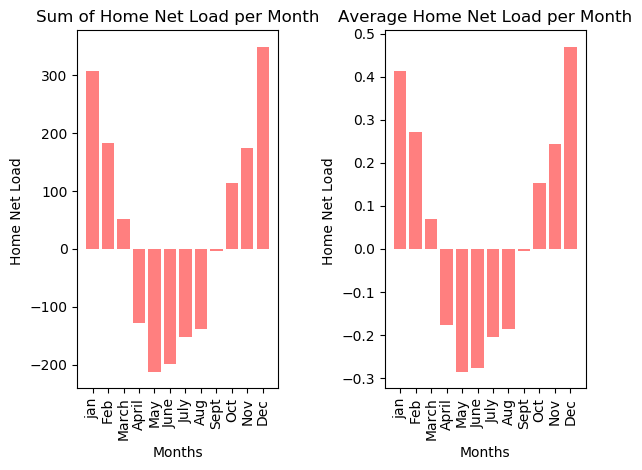

In [63]:
# Created list of months to be accessed
months = ('jan', 'Feb', 'March', 'April', 'May', 'June', 'July' ,'Aug', 'Sept', 'Oct','Nov',
          'Dec')
y_pos = np.arange(len(months))

plt.subplot(1,2,1)
plt.bar(y_pos, HNL_sum_df_m, align='center', alpha=0.5,color='r')
plt.xticks(y_pos, months)
plt.xlabel('Months')
plt.ylabel('Home Net Load ')
plt.title('Sum of Home Net Load per Month')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.bar(y_pos, HNL_avg_df_m, align='center', alpha=0.5,color='r')
plt.xticks(y_pos, months)
plt.xlabel('Months')
plt.ylabel('Home Net Load ')
plt.title('Average Home Net Load per Month')
plt.tight_layout()
plt.xticks(rotation=90)

plt.show()

### Inference
The following can be inferred from the above graph
-  The Home Net Load seems to be highly positive at the beginning of the year(January) and then gradually decreases till march and then moves on to be negative from April to September and then once again moves to the positive side during October and then continues to increase until it reaches its positive peak at the end of the year(December).

#### Bonus Insights
-  If we closely look at the original dataset, it can be determined that the Home Net Load is the Difference between the Home Load and Solar Geration.
-  It can be seen from the graphs that Home Net Load becomes negative during the Spring and Summer(April to September) when the Solar generatiom is high and the Home Load is relatively low. (This can be seen in the graph below)

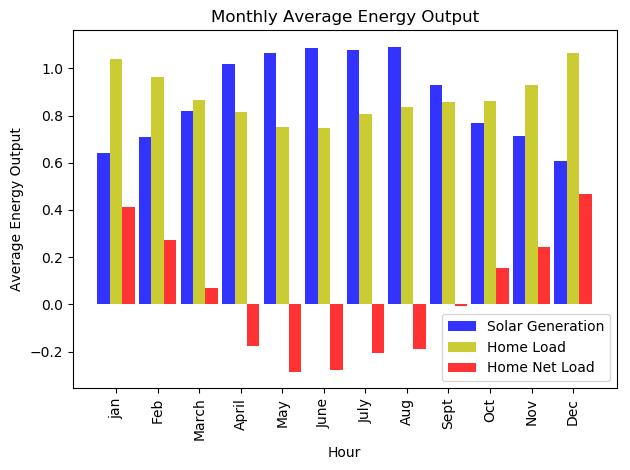

In [104]:
# Creating a list of months to be accessed 
months = ('jan', 'Feb', 'March', 'April', 'May', 'June', 'July' ,'Aug', 'Sept', 'Oct','Nov',
          'Dec')
# Data to plot
n_groups = len(months)
 
# Create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.30
opacity = 0.8
 
rects1 = plt.bar(index, SG_avg_df_m, bar_width,
alpha=opacity,
color='b',
label='Solar Generation')
 
rects2 = plt.bar(index + bar_width, HL_avg_df_m, bar_width,
alpha=opacity,
color='y',
label='Home Load')

rects3 = plt.bar(index + (bar_width * 2), HNL_avg_df_m, bar_width,
alpha=opacity,
color='r',
label='Home Net Load')
 
plt.xlabel('Hour')
plt.ylabel('Average Energy Output')
plt.title('Monthly Average Energy Output')
plt.xticks(index + bar_width, (months),rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

# 4. Daily Analysis
Determined the following
-  Average Solar Generation per day for the entire year
-  Average Home Load per day for the entire year
-  Average Home Net Load per day for the entire year

In [92]:
# Creating necessary lists to be acccessed later
df_Jan = df[df.Month==1]
df_Feb = df[df.Month==2]
df_Mar = df[df.Month==3]
df_Apr = df[df.Month==4]
df_May = df[df.Month==5]
df_Jun = df[df.Month==6]
df_Jul = df[df.Month==7]
df_Aug = df[df.Month==8]
df_Sep = df[df.Month==9]
df_Oct = df[df.Month==10]
df_Nov = df[df.Month==11]
df_Dec = df[df.Month==12]

## 4a. Solar Generation Statistics

In [93]:
# Solar Generation Statistics
SG_avg_df_d = []
SG_avg_df_d.append([df_Jan.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Feb.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Mar.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Apr.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_May.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Jun.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Jul.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Aug.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Sep.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Oct.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Nov.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation'],
                  df_Dec.groupby('Day', as_index=False).agg({"Solar Generation": "mean"})['Solar Generation']
                   ])

print('Solar Generation  Statstics')
print('Day','jan','Feb','Mar','April','May','June','July','Augus','Sep','Octob','Novem','Dec')

for i,(Day,Average_1,Average_2,Average_3,Average_4,Average_5,Average_6,Average_7,Average_8
       ,Average_9,Average_10,Average_11,Average_12) in enumerate(zip(df_Jan.Day.unique(), SG_avg_df_d[-1][0],SG_avg_df_d[-1][1],
                                                 SG_avg_df_d[0][2],SG_avg_df_d[0][3],SG_avg_df_d[0][4],
                                                SG_avg_df_d[0][5],SG_avg_df_d[0][6],SG_avg_df_d[0][7],
                                                SG_avg_df_d[0][8],SG_avg_df_d[0][9],SG_avg_df_d[0][10],
                                                                    SG_avg_df_d[0][11])):
    print('{} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f}'.format(Day,Average_1,Average_2,Average_3,Average_4,Average_5,Average_6,Average_7,Average_8
       ,Average_9,Average_10,Average_11,Average_12))


Solar Generation  Statstics
Day jan Feb Mar April May June July Augus Sep Octob Novem Dec
1 0.56 0.48 0.71 0.92 1.07 0.93 1.12 1.15 0.92 0.89 0.78 0.50
2 0.39 0.43 0.64 0.94 0.99 0.96 1.18 1.10 0.97 0.92 0.82 0.43
3 0.44 0.41 0.75 0.88 0.95 1.18 0.98 1.10 0.91 0.93 0.74 0.68
4 0.53 0.59 0.45 1.12 0.97 1.02 1.01 1.09 0.97 0.85 0.64 0.62
5 0.51 0.41 0.26 0.91 0.87 1.08 1.11 1.02 1.05 0.82 0.77 0.60
6 0.53 0.53 0.72 0.93 0.93 1.12 1.07 1.07 0.97 0.73 0.75 0.56
7 0.56 0.47 0.74 1.14 1.08 1.08 1.10 1.13 1.04 0.82 0.64 0.62
8 0.59 0.61 0.85 1.10 1.17 0.90 0.99 1.15 1.06 0.81 0.70 0.47
9 0.58 0.84 0.49 1.16 1.09 1.10 1.06 1.16 0.96 0.80 0.79 0.72
10 0.69 0.68 0.58 1.15 1.20 1.11 1.17 1.11 1.06 0.74 0.79 0.62
11 0.67 0.88 0.60 1.06 1.23 0.90 1.12 1.14 1.07 0.69 0.63 0.74
12 0.70 0.89 0.87 1.05 1.18 1.12 1.15 1.12 1.00 0.88 0.77 0.78
13 0.76 0.65 0.99 0.95 1.08 1.16 1.16 1.13 0.99 0.89 0.70 0.76
14 0.75 0.85 0.96 0.88 1.10 1.13 1.14 1.13 0.82 0.83 0.76 0.61
15 0.67 0.68 1.00 1.15 1.15 1.18 1.12

Average Solar Generation Output


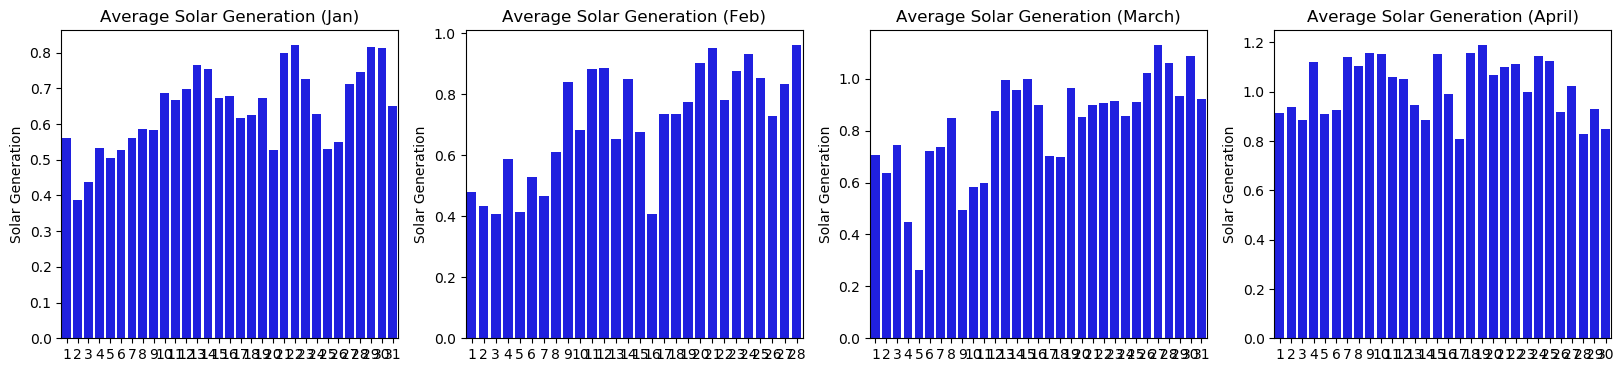

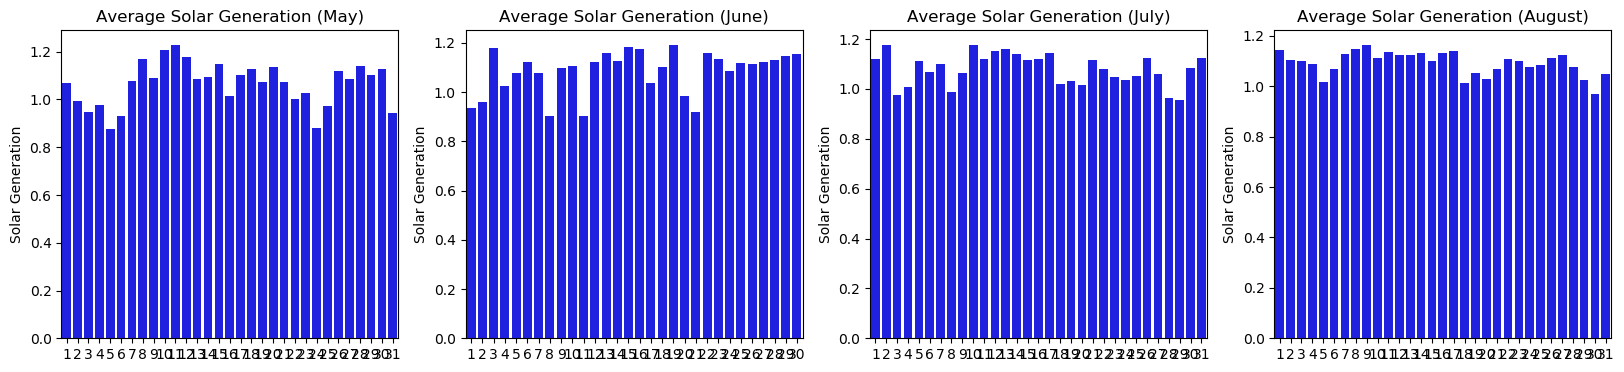

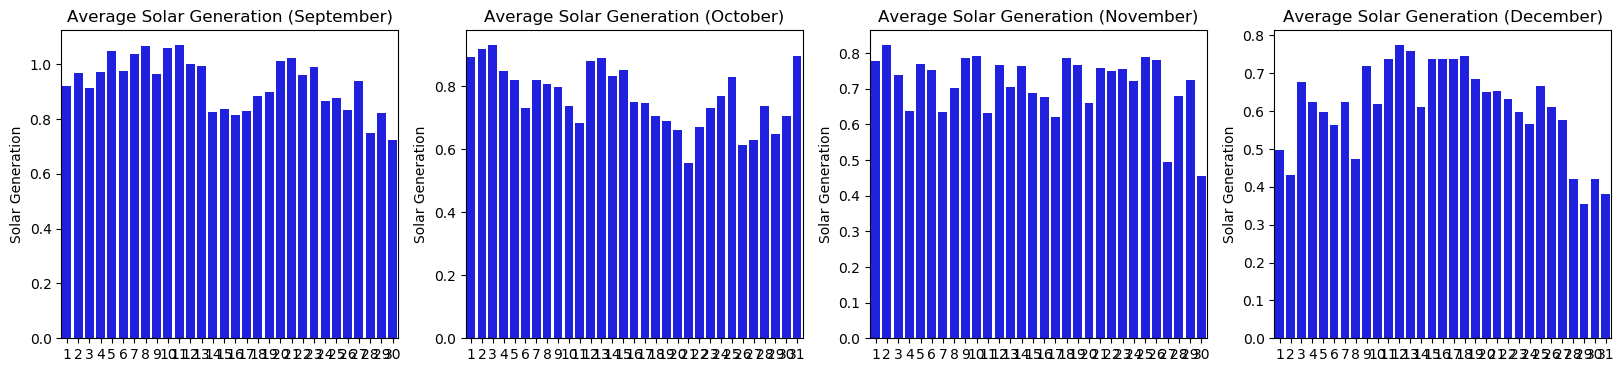

In [94]:
# Creating a plot
print('Average Solar Generation Output')
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_Jan.Day.unique(), y=SG_avg_df_d[-1][0], ax=axes[0],color='b')
axes[0].set_title('Average Solar Generation (Jan)')

sns.barplot(x=df_Feb.Day.unique(), y=SG_avg_df_d[-1][1], ax=axes[1],color='b')
axes[1].set_title('Average Solar Generation (Feb)')

sns.barplot(x=df_Mar.Day.unique(), y=SG_avg_df_d[-1][2], ax=axes[2],color='b')
axes[2].set_title('Average Solar Generation (March)')

sns.barplot(x=df_Apr.Day.unique(), y=SG_avg_df_d[-1][3], ax=axes[3],color='b')
axes[3].set_title('Average Solar Generation (April)')

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_May.Day.unique(), y=SG_avg_df_d[-1][4], ax=axes[0],color='b')
axes[0].set_title('Average Solar Generation (May)')

sns.barplot(x=df_Jun.Day.unique(), y=SG_avg_df_d[-1][5], ax=axes[1],color='b')
axes[1].set_title('Average Solar Generation (June)')

sns.barplot(x=df_Jul.Day.unique(), y=SG_avg_df_d[-1][6], ax=axes[2],color='b')
axes[2].set_title('Average Solar Generation (July)')

sns.barplot(x=df_Aug.Day.unique(), y=SG_avg_df_d[-1][7], ax=axes[3],color='b')
axes[3].set_title('Average Solar Generation (August)')

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_Sep.Day.unique(), y=SG_avg_df_d[-1][8], ax=axes[0],color='b')
axes[0].set_title('Average Solar Generation (September)')

sns.barplot(x=df_Oct.Day.unique(), y=SG_avg_df_d[-1][9], ax=axes[1],color='b')
axes[1].set_title('Average Solar Generation (October)')

sns.barplot(x=df_Nov.Day.unique(), y=SG_avg_df_d[-1][10], ax=axes[2],color='b')
axes[2].set_title('Average Solar Generation (November)')

sns.barplot(x=df_Dec.Day.unique(), y=SG_avg_df_d[-1][11], ax=axes[3],color='b')
axes[3].set_title('Average Solar Generation (December)')


plt.show()

### Inference
-  The Solar Generation per day for each month can be analyzed from the above graphs.

## 4b.Home Load Statistics

In [85]:
# Home Load Statistics
HL_avg_df_d = []
HL_avg_df_d.append([df_Jan.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Feb.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Mar.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Apr.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_May.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Jun.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Jul.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Aug.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Sep.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Oct.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Nov.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load'],
                    df_Dec.groupby('Day', as_index=False).agg({"Home Load": "mean"})['Home Load']
                   ])
print('Home Load  Statstics')
print('Day','jan','Feb','Mar','April','May','June','July','Augus','Sep','Octob','Novem','Dec')

for i,(Day,Average_1,Average_2,Average_3,Average_4,Average_5,Average_6,Average_7,Average_8
       ,Average_9,Average_10,Average_11,Average_12) in enumerate(zip(df_Jan.Day.unique(), HL_avg_df_d[0][0],HL_avg_df_d[0][1],
                                                 HL_avg_df_d[0][2],HL_avg_df_d[0][3],HL_avg_df_d[0][4],
                                                HL_avg_df_d[0][5],HL_avg_df_d[0][6],HL_avg_df_d[0][7],
                                                HL_avg_df_d[0][8],HL_avg_df_d[0][9],HL_avg_df_d[0][10],
                                                                    HL_avg_df_d[0][11])):
    print('{} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f}'.format(Day,Average_1,Average_2,Average_3,Average_4,Average_5,Average_6,Average_7,Average_8
       ,Average_9,Average_10,Average_11,Average_12))

Home Load  Statstics
Day jan Feb Mar April May June July Augus Sep Octob Novem Dec
1 1.05 0.96 0.86 0.82 0.75 0.73 0.80 0.85 0.84 0.89 0.92 1.07
2 1.04 0.96 0.86 0.82 0.75 0.73 0.79 0.84 0.88 0.88 0.92 1.08
3 1.04 0.97 0.87 0.81 0.74 0.74 0.76 0.85 0.90 0.87 0.92 1.08
4 1.04 0.97 0.88 0.81 0.75 0.76 0.78 0.85 0.91 0.85 0.94 1.07
5 1.04 0.98 0.88 0.81 0.75 0.77 0.80 0.87 0.88 0.86 0.94 1.06
6 1.04 0.96 0.87 0.81 0.76 0.76 0.80 0.88 0.86 0.84 0.92 1.07
7 1.05 0.96 0.86 0.81 0.76 0.74 0.79 0.85 0.87 0.87 0.92 1.07
8 1.05 0.96 0.86 0.82 0.74 0.73 0.81 0.86 0.87 0.88 0.92 1.07
9 1.03 0.96 0.86 0.82 0.75 0.73 0.83 0.85 0.90 0.85 0.92 1.08
10 1.03 0.96 0.86 0.81 0.75 0.75 0.81 0.85 0.89 0.85 0.92 1.08
11 1.03 0.97 0.88 0.81 0.75 0.74 0.84 0.85 0.84 0.84 0.94 1.06
12 1.03 0.97 0.87 0.81 0.76 0.74 0.86 0.77 0.83 0.85 0.94 1.07
13 1.03 0.96 0.86 0.81 0.79 0.74 0.85 0.76 0.84 0.85 0.92 1.07
14 1.04 0.96 0.86 0.81 0.79 0.74 0.82 0.76 0.84 0.88 0.92 1.07
15 1.04 0.96 0.86 0.82 0.77 0.76 0.81 0.75 0

Average Home Load Output


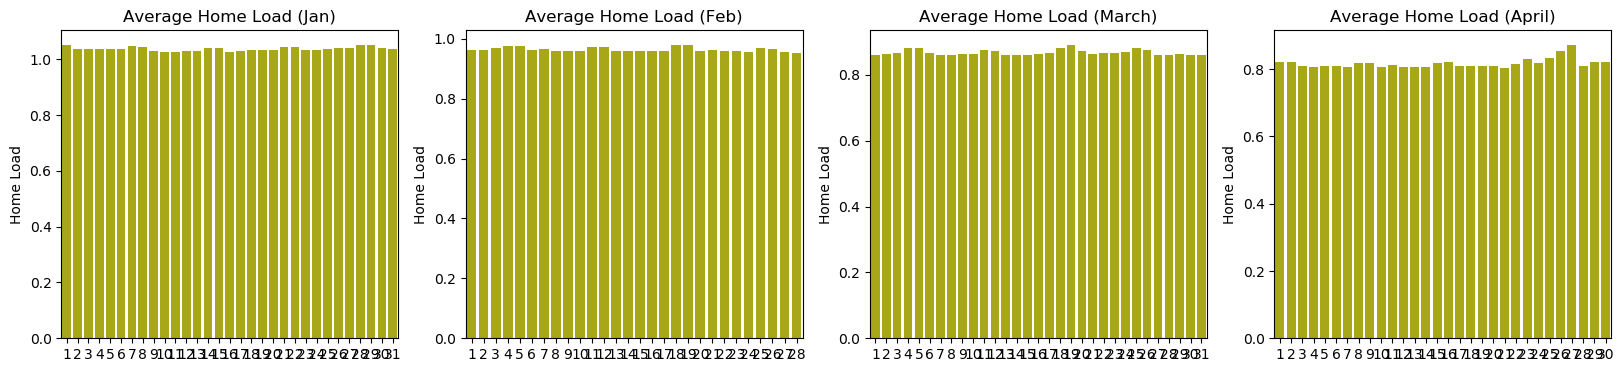

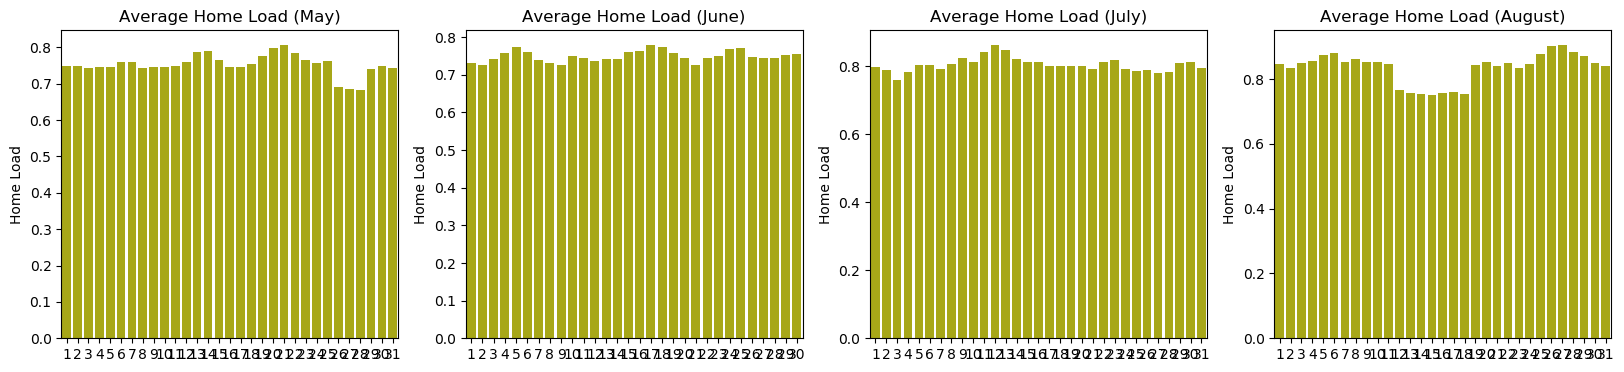

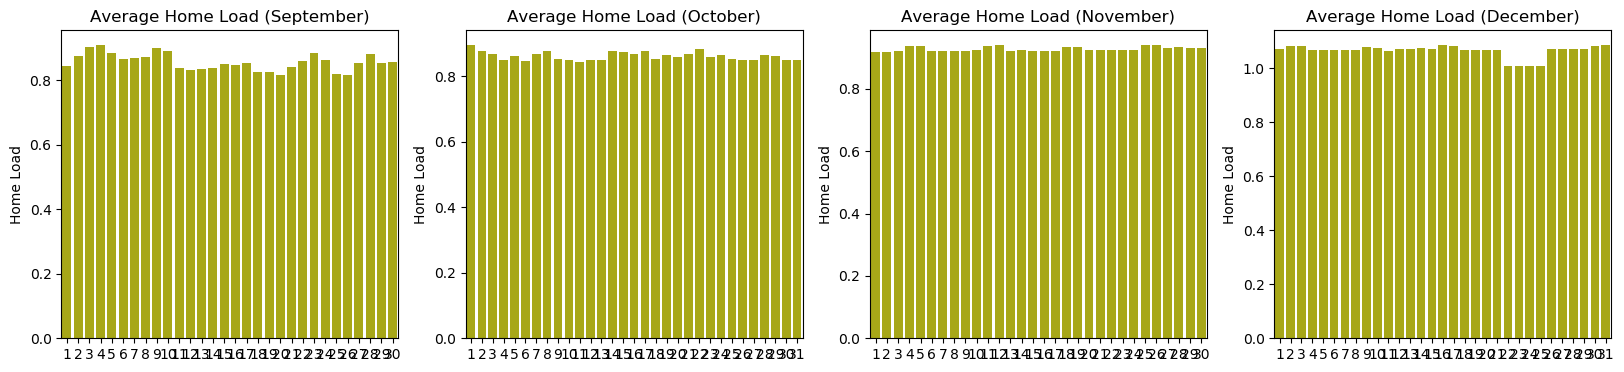

In [91]:
# Creating a plot
print('Average Home Load Output')
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_Jan.Day.unique(), y=HL_avg_df_d[-1][0], ax=axes[0],color='y')
axes[0].set_title('Average Home Load (Jan)')

sns.barplot(x=df_Feb.Day.unique(), y=HL_avg_df_d[-1][1], ax=axes[1],color='y')
axes[1].set_title('Average Home Load (Feb)')

sns.barplot(x=df_Mar.Day.unique(), y=HL_avg_df_d[-1][2], ax=axes[2],color='y')
axes[2].set_title('Average Home Load (March)')

sns.barplot(x=df_Apr.Day.unique(), y=HL_avg_df_d[-1][3], ax=axes[3],color='y')
axes[3].set_title('Average Home Load (April)')

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_May.Day.unique(), y=HL_avg_df_d[-1][4], ax=axes[0],color='y')
axes[0].set_title('Average Home Load (May)')

sns.barplot(x=df_Jun.Day.unique(), y=HL_avg_df_d[-1][5], ax=axes[1],color='y')
axes[1].set_title('Average Home Load (June)')

sns.barplot(x=df_Jul.Day.unique(), y=HL_avg_df_d[-1][6], ax=axes[2],color='y')
axes[2].set_title('Average Home Load (July)')

sns.barplot(x=df_Aug.Day.unique(), y=HL_avg_df_d[-1][7], ax=axes[3],color='y')
axes[3].set_title('Average Home Load (August)')

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_Sep.Day.unique(), y=HL_avg_df_d[-1][8], ax=axes[0],color='y')
axes[0].set_title('Average Home Load (September)')

sns.barplot(x=df_Oct.Day.unique(), y=HL_avg_df_d[-1][9], ax=axes[1],color='y')
axes[1].set_title('Average Home Load (October)')

sns.barplot(x=df_Nov.Day.unique(), y=HL_avg_df_d[-1][10], ax=axes[2],color='y')
axes[2].set_title('Average Home Load (November)')

sns.barplot(x=df_Dec.Day.unique(), y=HL_avg_df_d[-1][11], ax=axes[3],color='y')
axes[3].set_title('Average Home Load (December)')


plt.show()

### Inference
-  The Home Load per day for each month can be analyzed from the above graphs.

## 4c. Home Net Load Statistics

In [95]:
# Home Net Load Statistics   
HNL_avg_df_d = []
HNL_avg_df_d.append([df_Jan.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Feb.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Mar.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Apr.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_May.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Jun.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Jul.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Aug.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Sep.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Oct.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Nov.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load'],
                     df_Dec.groupby('Day', as_index=False).agg({"Home Net Load": "mean"})['Home Net Load']
                    ])

print('Home Net Load  Statstics')
print('Day','jan','Feb','Mar','April','May','June','July','Augus','Sep','Octob','Novem','Dec')

for i,(Day,Average_1,Average_2,Average_3,Average_4,Average_5,Average_6,Average_7,Average_8
       ,Average_9,Average_10,Average_11,Average_12) in enumerate(zip(df_Jan.Day.unique(), HNL_avg_df_d[0][0],HNL_avg_df_d[0][1],
                                                 HNL_avg_df_d[0][2],HNL_avg_df_d[0][3],HNL_avg_df_d[0][4],
                                                HNL_avg_df_d[0][5],HNL_avg_df_d[0][6],HNL_avg_df_d[0][7],
                                                HNL_avg_df_d[0][8],HNL_avg_df_d[0][9],HNL_avg_df_d[0][10],
                                                                    HNL_avg_df_d[0][11])):
    print('{} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f} {:.2f}'.format(Day,Average_1,Average_2,Average_3,Average_4,Average_5,Average_6,Average_7,Average_8
       ,Average_9,Average_10,Average_11,Average_12))

Home Net Load  Statstics
Day jan Feb Mar April May June July Augus Sep Octob Novem Dec
1 0.50 0.49 0.17 -0.07 -0.29 -0.47 -0.25 -0.23 -0.01 0.06 0.49 0.59
2 0.66 0.54 0.24 -0.10 -0.22 -0.17 -0.32 -0.20 -0.02 0.02 0.12 0.66
3 0.61 0.57 0.14 -0.05 -0.18 -0.36 -0.15 -0.18 0.05 0.00 0.20 0.42
4 0.52 0.40 0.44 -0.28 -0.20 -0.20 -0.15 -0.16 0.00 0.06 0.31 0.46
5 0.54 0.57 0.62 -0.08 -0.11 -0.23 -0.24 -0.07 -0.10 0.10 0.19 0.48
6 0.52 0.45 0.16 -0.09 -0.15 -0.29 -0.20 -0.12 -0.04 0.17 0.19 0.52
7 0.50 0.51 0.14 -0.31 -0.29 -0.27 -0.24 -0.21 -0.10 0.11 0.30 0.46
8 0.47 0.36 0.03 -0.26 -0.40 -0.10 -0.11 -0.22 -0.12 0.13 0.24 0.61
9 0.46 0.14 0.38 -0.31 -0.32 -0.30 -0.17 -0.24 0.00 0.12 0.15 0.38
10 0.36 0.29 0.30 -0.32 -0.43 -0.29 -0.29 -0.19 -0.10 0.17 0.15 0.47
11 0.37 0.11 0.29 -0.22 -0.45 -0.09 -0.21 -0.22 -0.16 0.22 0.32 0.34
12 0.35 0.11 0.02 -0.22 -0.39 -0.32 -0.22 -0.29 -0.10 0.03 0.19 0.31
13 0.29 0.32 -0.11 -0.11 -0.27 -0.34 -0.24 -0.30 -0.09 0.02 0.24 0.33
14 0.31 0.13 -0.07 -0.06 -0

Average Home Net Load Output


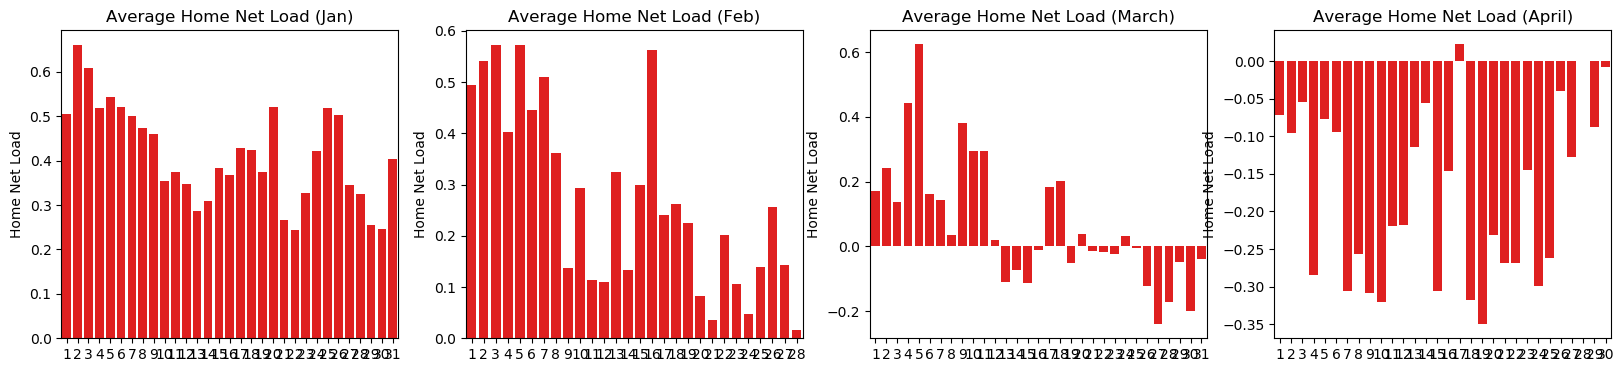

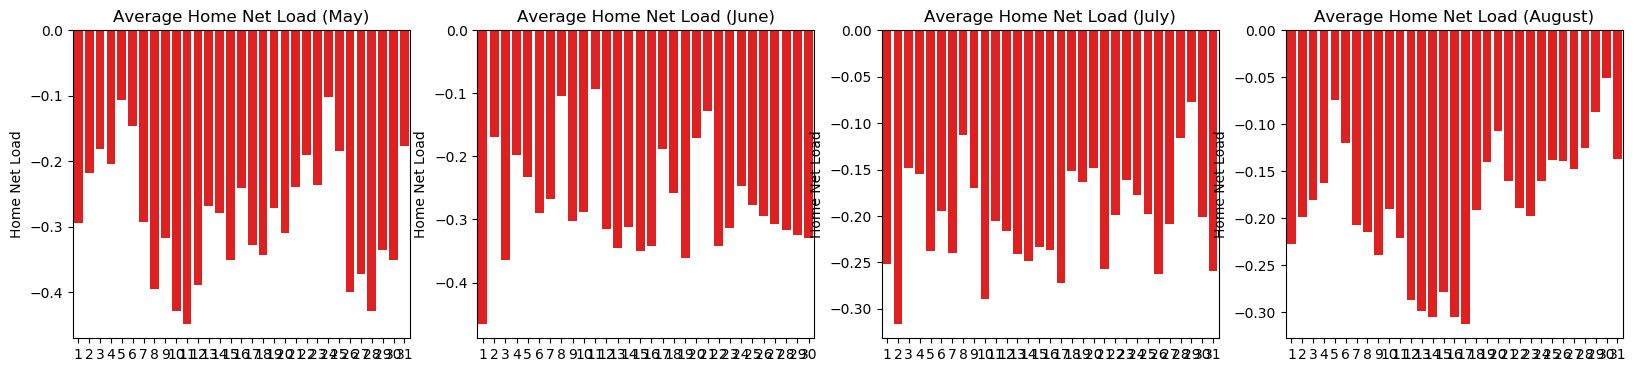

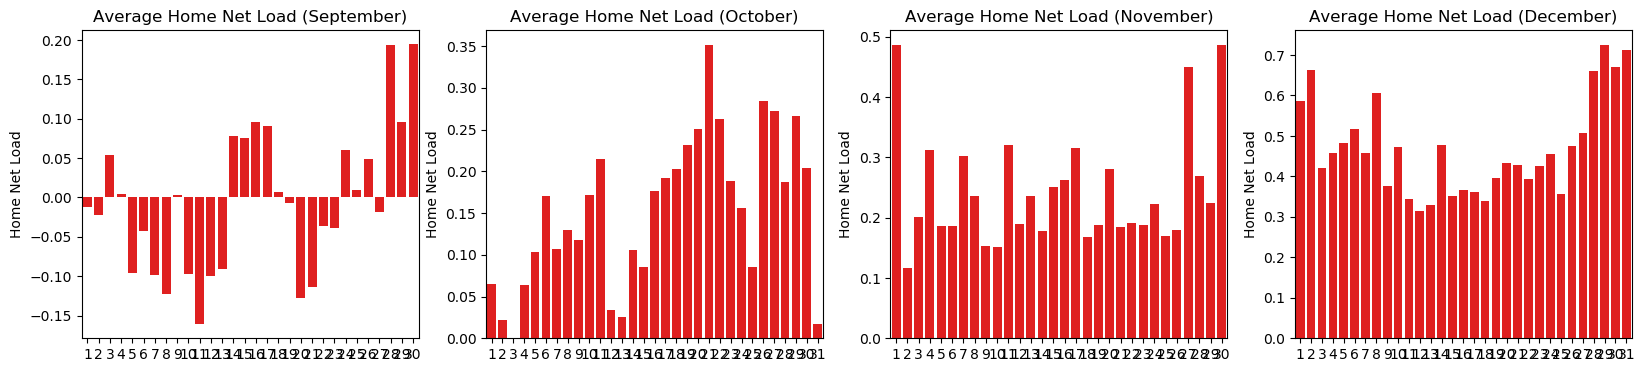

In [96]:
# Creating a plot
print('Average Home Net Load Output')
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_Jan.Day.unique(), y=HNL_avg_df_d[-1][0], ax=axes[0],color='r')
axes[0].set_title('Average Home Net Load (Jan)')

sns.barplot(x=df_Feb.Day.unique(), y=HNL_avg_df_d[-1][1], ax=axes[1],color='r')
axes[1].set_title('Average Home Net Load (Feb)')

sns.barplot(x=df_Mar.Day.unique(), y=HNL_avg_df_d[-1][2], ax=axes[2],color='r')
axes[2].set_title('Average Home Net Load (March)')

sns.barplot(x=df_Apr.Day.unique(), y=HNL_avg_df_d[-1][3], ax=axes[3],color='r')
axes[3].set_title('Average Home Net Load (April)')

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_May.Day.unique(), y=HNL_avg_df_d[-1][4], ax=axes[0],color='r')
axes[0].set_title('Average Home Net Load (May)')

sns.barplot(x=df_Jun.Day.unique(), y=HNL_avg_df_d[-1][5], ax=axes[1],color='r')
axes[1].set_title('Average Home Net Load (June)')

sns.barplot(x=df_Jul.Day.unique(), y=HNL_avg_df_d[-1][6], ax=axes[2],color='r')
axes[2].set_title('Average Home Net Load (July)')

sns.barplot(x=df_Aug.Day.unique(), y=HNL_avg_df_d[-1][7], ax=axes[3],color='r')
axes[3].set_title('Average Home Net Load (August)')

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_Sep.Day.unique(), y=HNL_avg_df_d[-1][8], ax=axes[0],color='r')
axes[0].set_title('Average Home Net Load (September)')

sns.barplot(x=df_Oct.Day.unique(), y=HNL_avg_df_d[-1][9], ax=axes[1],color='r')
axes[1].set_title('Average Home Net Load (October)')

sns.barplot(x=df_Nov.Day.unique(), y=HNL_avg_df_d[-1][10], ax=axes[2],color='r')
axes[2].set_title('Average Home Net Load (November)')

sns.barplot(x=df_Dec.Day.unique(), y=HNL_avg_df_d[-1][11], ax=axes[3],color='r')
axes[3].set_title('Average Home Net Load (December)')


plt.show()

### Inference
-  The Home Net Load day for each month can be analyzed from the above graphs.

## 4d. Battery State of Charge Statistics

Average Battery State Charge Output


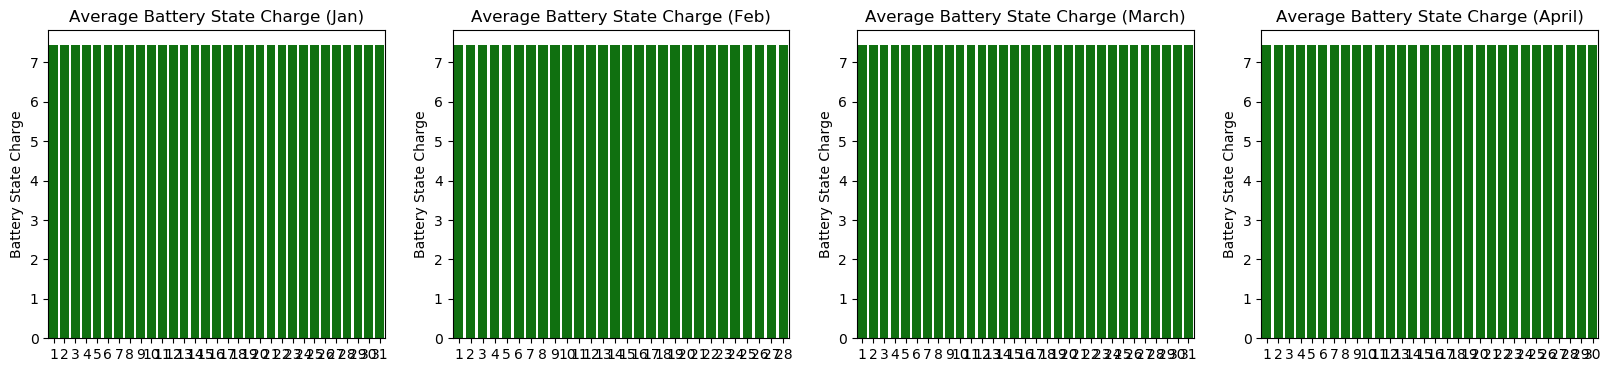

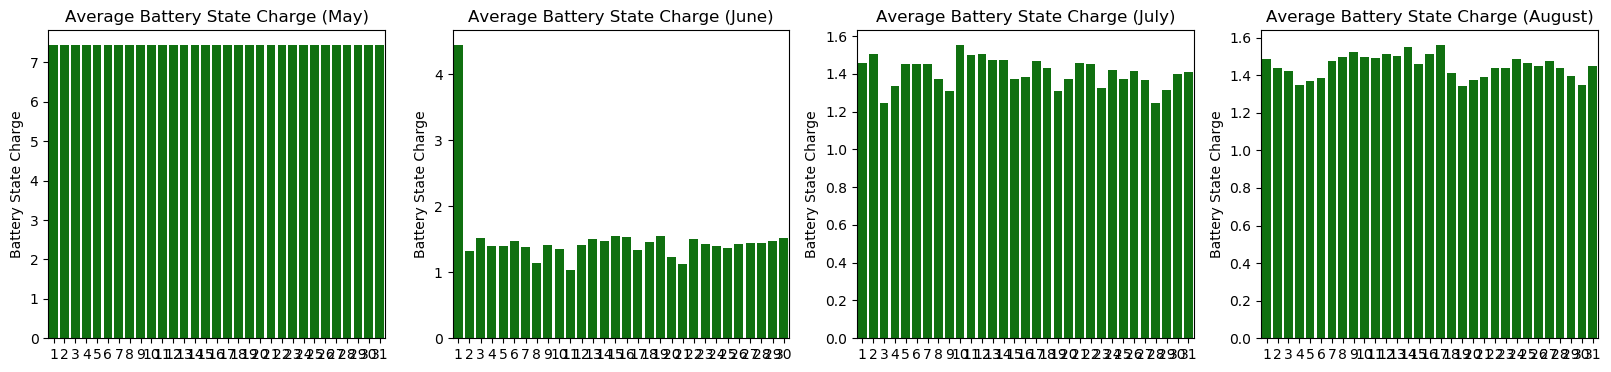

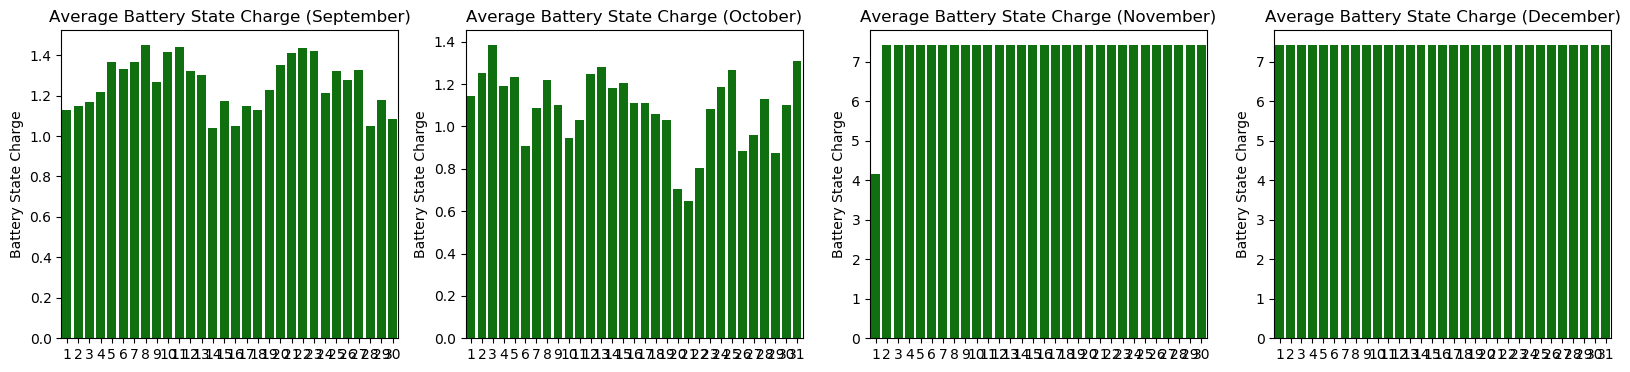

In [97]:
# Battery State Charge Statistics
BSC_avg_df_d = []
BSC_avg_df_d.append([df_Jan.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Feb.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Mar.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Apr.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_May.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Jun.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Jul.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Aug.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Sep.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Oct.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Nov.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge'],
                     df_Dec.groupby('Day', as_index=False).agg({"Battery State Charge": "mean"})['Battery State Charge']
                    ])
print('Average Battery State Charge Output')
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_Jan.Day.unique(), y=BSC_avg_df_d[-1][0], ax=axes[0],color='g')
axes[0].set_title('Average Battery State Charge (Jan)')

sns.barplot(x=df_Feb.Day.unique(), y=BSC_avg_df_d[-1][1], ax=axes[1],color='g')
axes[1].set_title('Average Battery State Charge (Feb)')

sns.barplot(x=df_Mar.Day.unique(), y=BSC_avg_df_d[-1][2], ax=axes[2],color='g')
axes[2].set_title('Average Battery State Charge (March)')

sns.barplot(x=df_Apr.Day.unique(), y=BSC_avg_df_d[-1][3], ax=axes[3],color='g')
axes[3].set_title('Average Battery State Charge (April)')

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_May.Day.unique(), y=BSC_avg_df_d[-1][4], ax=axes[0],color='g')
axes[0].set_title('Average Battery State Charge (May)')

sns.barplot(x=df_Jun.Day.unique(), y=BSC_avg_df_d[-1][5], ax=axes[1],color='g')
axes[1].set_title('Average Battery State Charge (June)')

sns.barplot(x=df_Jul.Day.unique(), y=BSC_avg_df_d[-1][6], ax=axes[2],color='g')
axes[2].set_title('Average Battery State Charge (July)')

sns.barplot(x=df_Aug.Day.unique(), y=BSC_avg_df_d[-1][7], ax=axes[3],color='g')
axes[3].set_title('Average Battery State Charge (August)')

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.barplot(x=df_Sep.Day.unique(), y=BSC_avg_df_d[-1][8], ax=axes[0],color='g')
axes[0].set_title('Average Battery State Charge (September)')

sns.barplot(x=df_Oct.Day.unique(), y=BSC_avg_df_d[-1][9], ax=axes[1],color='g')
axes[1].set_title('Average Battery State Charge (October)')

sns.barplot(x=df_Nov.Day.unique(), y=BSC_avg_df_d[-1][10], ax=axes[2],color='g')
axes[2].set_title('Average Battery State Charge (November)')

sns.barplot(x=df_Dec.Day.unique(), y=BSC_avg_df_d[-1][11], ax=axes[3],color='g')
axes[3].set_title('Average Battery State Charge (December)')


plt.show()

### Inference
-  The Battery State of Charge per day for each month can be analyzed from the above graphs.

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

# 5. Hourly Analysis
Determined the following
-  Average Solar Generation at each time of the day for the entire year
-  Average Home Load at each time of the day for the entire year
-  Average Home Net Load at each time of the day for the entire year

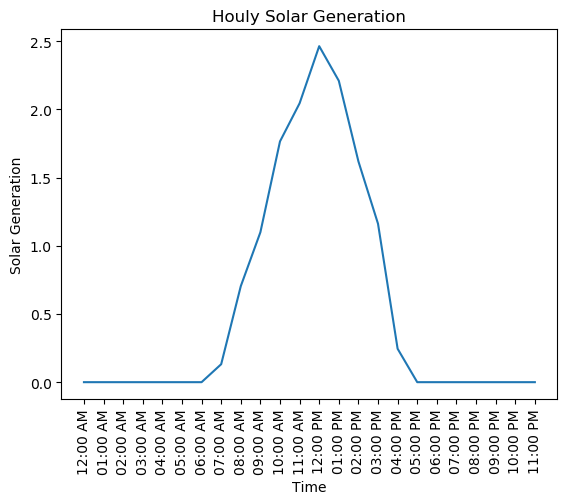

In [80]:
# Exploring Hourly Solar Generation of January to see a trend
df_Time = []
df_SG_h = []
for i in range(len(df)):
    if df['Day'][i] == 1 and df['Month'][i] == 1:
        df_Time.append(df['Time'][i])
        df_SG_h.append(df['Solar Generation'][i])
    else:
            break
plt.plot(df_Time,df_SG_h)
plt.title('Houly Solar Generation')
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Solar Generation')
plt.show()


In [74]:
# Creating necessary lists and dictionaries to access for building plots
SG_Time_avg = df.groupby('Time', as_index=False,sort =False).agg({"Solar Generation": "mean"})['Solar Generation']
HL_Time_avg = df.groupby('Time', as_index=False,sort =False).agg({"Home Load": "mean"})['Home Load']
BSC_Time_avg = df.groupby('Time', as_index=False,sort =False).agg({"Battery State Charge": "mean"})['Battery State Charge']
HNL_Time_avg = df.groupby('Time', as_index=False,sort =False).agg({"Home Net Load": "mean"})['Home Net Load']

## 5.a Solar Generation Statistics

In [75]:
# Solar Generation Statistics
print('Solar Generation Statstics')

fmt = '{:<15}{}'

print(fmt.format('Hours','Average'))
for months, (Hour,Average) in enumerate(zip(df_Time, SG_avg_df_m)):
    print(fmt.format(Hour,Average))


Solar Generation Statstics
Hours          Average
12:00 AM       0.6401173966155919
01:00 AM       0.7091530792663696
02:00 AM       0.8184166402338713
03:00 AM       1.0195469733138893
04:00 AM       1.0639966552701619
05:00 AM       1.0845458299750006
06:00 AM       1.0789985990362916
07:00 AM       1.092023144252688
08:00 AM       0.9284360755402774
09:00 AM       0.767731380251344
10:00 AM       0.7133973021402777
11:00 AM       0.6090886905940867


## 5.b Home Load Statistics

In [76]:
# Home Load Statistics
print('Home Load Statstics')

fmt = '{:<15}{}'

print(fmt.format('Hours','Average'))
for months, (Hour,Average) in enumerate(zip(df_Time, HL_avg_df_m)):
    print(fmt.format(Hour,Average))


Home Load Statstics
Hours          Average
12:00 AM       1.0375885743642475
01:00 AM       0.9639359890535728
02:00 AM       0.8677214690161302
03:00 AM       0.8170362240347212
04:00 AM       0.7524225519516129
05:00 AM       0.7492993526986111
06:00 AM       0.8047669475860209
07:00 AM       0.8355498467459679
08:00 AM       0.8570153332458336
09:00 AM       0.8609958301962362
10:00 AM       0.9274190011291665
11:00 AM       1.0636100806841395


## 5.c Home Net Load Statistics.

In [77]:
# Home Net Load Statistics
print('Home Net Load Statstics')

fmt = '{:<15}{}'

print(fmt.format('Hours','Average'))
for months, (Hour,Average) in enumerate(zip(df_Time, HNL_avg_df_m)):
    print(fmt.format(Hour,Average))


Home Net Load Statstics
Hours          Average
12:00 AM       0.41347411267607564
01:00 AM       0.27251173675446455
02:00 AM       0.06976524476747306
03:00 AM       -0.17702207492361102
04:00 AM       -0.2849741869448926
05:00 AM       -0.27654424969444474
06:00 AM       -0.2047522900403228
07:00 AM       -0.1866875538494622
08:00 AM       -0.005815570361111087
09:00 AM       0.15314505042607532
10:00 AM       0.24276719217777754
11:00 AM       0.4697486073655911


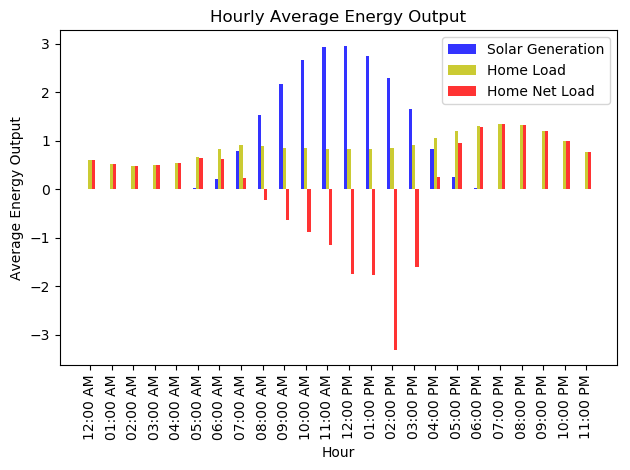

In [103]:
# Data to plot
n_groups = len(df_Time)
 
# Create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
 
rects1 = plt.bar(index, SG_Time_avg, bar_width,
alpha=opacity,
color='b',
label='Solar Generation')
 
rects2 = plt.bar(index + bar_width, HL_Time_avg, bar_width,
alpha=opacity,
color='y',
label='Home Load')

rects3 = plt.bar(index + (bar_width * 2), HNL_Time_avg, bar_width,
alpha=opacity,
color='r',
label='Home Net Load')
 
plt.xlabel('Hour')
plt.ylabel('Average Energy Output')
plt.title('Hourly Average Energy Output')
plt.xticks(index + bar_width, (df_Time),rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()

### Inference
The following can be inferred from the above graph :
-  From 12:00 am to 6:00 am and 6:00 pm to 12 am, there seems to be almost no Solar Generation.
-  Solar generation begins to increase from 6:00 am to 11:00 and then remains constant till 12:00 pm and then begins to gradually decrease as it reaches 6:00 pm.
-  Solar Generation seems to be at its peak during the afternoon interval of 11:00 am to 12:00 pm.

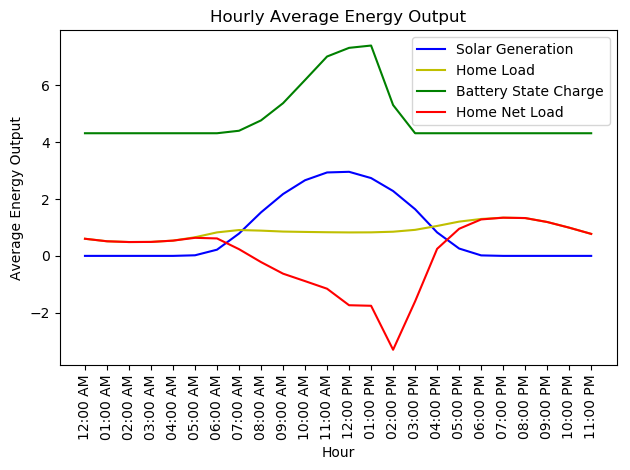

In [79]:
# create plot
plt.plot(df_Time, SG_Time_avg,color='b')
plt.plot(df_Time, HL_Time_avg,color='y')
plt.plot(df_Time, BSC_Time_avg,color='g')
plt.plot(df_Time, HNL_Time_avg,color='r')
 
plt.xlabel('Hour')
plt.ylabel('Average Energy Output')
plt.title('Hourly Average Energy Output')
plt.xticks(rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()

### Inference
The followign can be inferred from the above graph
-  This is another way of looking at the previous graph.
-  It is easier to see that Solar Generation almost follows a Normal Distribution in this graph.

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

# Summary

-  Solar Generation
    -  Solar Generation is found to be higher during Spring and Summer seasons and relatively lower during Winter and Fall.
    -  Solar Generation is found to be at its peak during the middle portion of the day.(11:00 am to 12:00 pm)
-  Home Load
    -  Home Load is found to be higher during Winter and Fall seasons and relatively low during Spring and Summer.
    -  Home Load is found to be highest during January and December.
-  Home Net Load
    -  Home Net Load is found to be directly correlated with Home Load and Solar Generation.
    -  Home Net Load is found to be Negative during the entire period of Spring and Summer.
    -  Home Net Load is found to be High when the Solar Generation is high and the Home Load is relatively Low.
-  Batter State of Charge
    -  The average Battery State of Charge is found to be similar for the first five months of the year.
    -  The average Battery State of Charge is found to drastically drop in June and remain almost constant till October.
    -  The average Battery State of Charge is found to once again increase in November and December.
    -  The average Battery State of Charge in November and December is almost same as the first five months.
    